In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

!ls data/

CNN2_1024_bs.npy		 durations_lr100_tau0.0001.npy
CNN2_relative.durations.npy	 durations_lr100_tau0.1.npy
CNN2_relative.npy		 durations_lr100_tau0.5.npy
CNN2_relative.returns.npy	 durations_lr1_tau0.0001.npy
durations_lr0.001_tau0.0001.npy  durations_lr1_tau0.1.npy
durations_lr0.001_tau0.1.npy	 durations_lr1_tau0.5.npy
durations_lr0.001_tau0.5.npy


In [2]:
Y_FILENAME = 'data/CNN2_relative.durations.npy'
y = np.load(Y_FILENAME)
y = pd.Series(y,name='Durations')
y.index.name='episodes'

Z_FILENAME = 'data/CNN2_relative.returns.npy'
z = np.load(Z_FILENAME)
z = pd.Series(z,name='Returns')
z.index.name='episodes'

df = pd.DataFrame([y,z]).transpose()

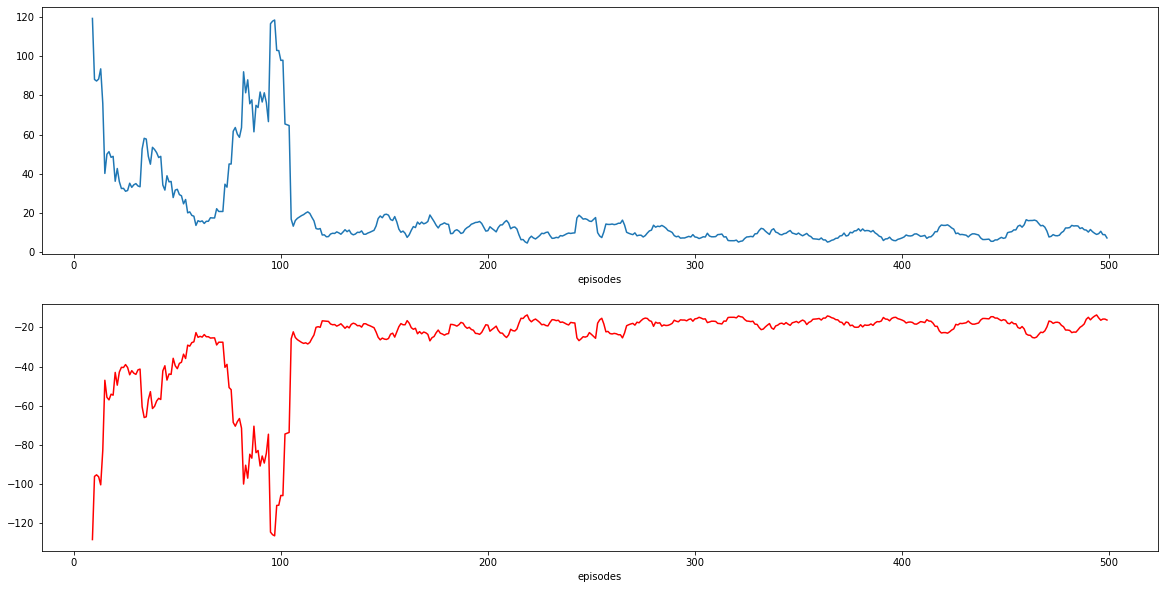

In [3]:
fig,axs=plt.subplots(2,1,figsize=[20,10])
df['Durations'].iloc[:500].rolling(10).mean().plot(ax=axs[0]);
df['Returns'].iloc[:500].rolling(10).mean().plot(ax=axs[1],color='red');